In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# GET THE STOCK QUOTE

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-08-19')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747408
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880667
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233
...,...,...,...,...,...,...
2022-08-12,172.169998,169.399994,169.820007,172.100006,67946400.0,172.100006
2022-08-15,173.389999,171.350006,171.520004,173.190002,54091700.0,173.190002
2022-08-16,173.710007,171.660004,172.779999,173.029999,56377100.0,173.029999


In [5]:
df.shape

(2675, 6)

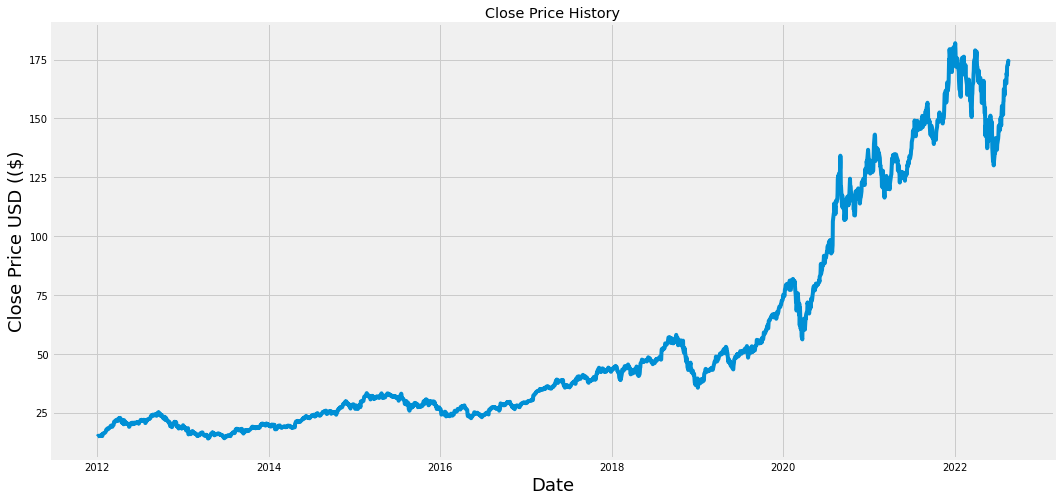

In [6]:
# VISUALIZE THE CLOSING PRICE HISTORY

plt.figure(figsize=(16,8))

plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD (($)', fontsize=18)
plt.show()


In [7]:
# CREATE NEW DATAFRAME WITH ONLY CLOSE COLUMN

data = df.filter(['Close'])

#CONVERT THE DATAFRAME TO A NUMPY ARRAY
dataset = data.values

# GET THEN UMBER OF ROWS TO TRAIN THE MODEL
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2140

In [8]:
# SCALE THE DATA

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.94656752],
       [0.9556118 ],
       [0.95323168]])

In [13]:
# CREATE THE TRAINING DATASET
# CREATE A SCALED TRAINING DATASET

train_data = scaled_data[0:training_data_len, :]

# SPLIT THE DATA INTO X_TRAIN AND Y_TRAIN DATASETS
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [14]:
# CONVERT THE X_TRAIN AND Y_TRAIN TO NUMPY ARRAYS

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# RESHAPE THE DATA
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2080, 60, 1)

In [20]:
# BUILD THE LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
# COMPILE THE MODEL
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# TRAIN THE MODEL
model.fit(x_train, y_train, batch_size=1, epochs=1)

2080/2080 [==============================] - 69s 31ms/step - loss: 2.6940e-04


In [23]:
# CREATE THE TESTING DATA SET
# CREATE A NEW ARRAY CONTAINING SCALED VALUES

test_data = scaled_data[training_data_len - 60: , :]

# CREATE THE DATASETS X_TEST AND Y_TEST
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [24]:
# CONVERT THE DATA TO A NUMPY ARRAY
x_test = np.array(x_test)

In [25]:
# RESHAPE THE DATA
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
# GET THE MODELS PREDICTED PRICE VALUES
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

17/17 [==============================] - 2s 35ms/step


In [27]:
# GET THE ROOT MEAN SQUARED ERROR (RSME) CLOSER TO ZERO THE BETTER
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

1.6598160930883104

C:\Users\jerome\AppData\Local\Temp\ipykernel_5528\3777362667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


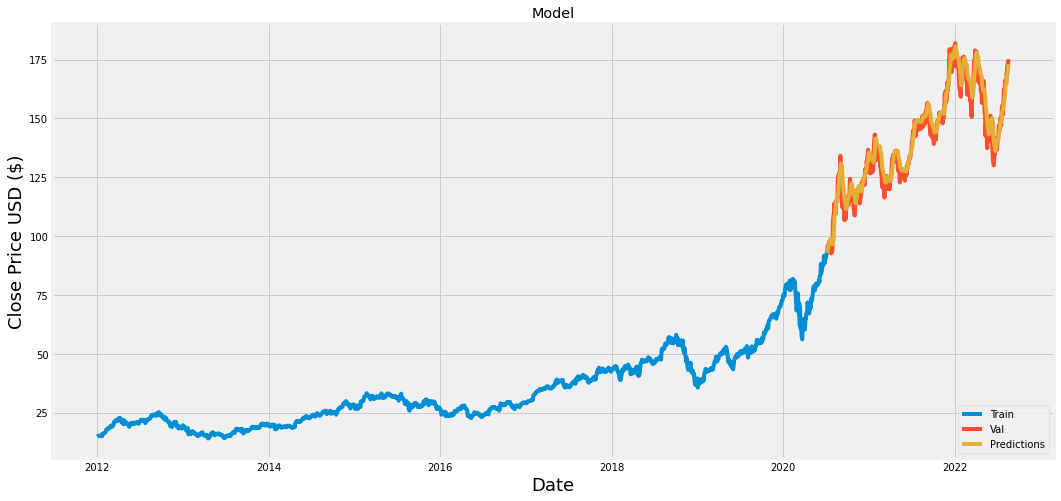

In [28]:
# PLOT THE DATA
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
# SHOW THE VALID AND PREDICTED PRICES
valid

,Close,Predictions
Date,,
2020-07-07,93.172501,92.886574
2020-07-08,95.342499,93.382599
2020-07-09,95.752502,94.109291
2020-07-10,95.919998,94.920540
2020-07-13,95.477501,95.703865
...,...,...
2022-08-12,172.100006,168.240234
2022-08-15,173.190002,169.418396
2022-08-16,173.029999,170.722946


In [34]:
# PREDICT FUTURE PRICE
# GET THE QUOTE

apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-08-19')

# CREATE A NEW DATAFRAME

new_df = apple_quote.filter(['Close'])

# GET THE LAST 60 DAY CLOSING PRICE VALUES AND CONVERT THE DATAFRAME TO AN ARRAY

last_60_days = new_df[-60:].values

# SCALED THE DATA TO BE VALUES BETWEEN 0 AND 1
last_60_days_scaled = scaler.transform(last_60_days)

# CREATE AN EMPTY LIST
X_test = []

# APPEND THE PAST 60 DAYS
X_test.append(last_60_days_scaled)

# CONVERT THE X_TEST DATASET TO NUMPY ARRAY
X_test = np.array(X_test)

# RESHAPE THE DATA
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# GET THE PREDICTED SCALED PRICE
pred_price = model.predict(X_test)

# UNDO THE SCALING

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 27ms/step
[[174.04706]]


In [36]:
# GET THE QUOTE

apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-08-18', end='2022-08-18')
print(apple_quote2['Close'])

Date
2022-08-17    174.550003
2022-08-18    174.149994
Name: Close, dtype: float64
